# Uber Data Analysis

<b>Basic Functionalities on the Data Set and a basic plot</b>

I have taken up the Uber pick ups in NYC Data Set from Kaggle for the month of April , May , June , July , August and Septmeber

Link to the DataSet: https://www.kaggle.com/fivethirtyeight/uber-pickups-in-new-york-city/version/2

License is : CC0 Public Domain</br>
The above license is the no copyrights license which allows an individual to copy , modify , distribute and perform the work for commercial purposes as well without the requirement for any permission.

Data Type: Raw

Data Size:</br> 
uber-raw-data-apr14.csv - 26.11 MB</br>
uber-raw-data-may14.csv - 30.17 MB</br>
uber-raw-data-jun14.csv - 30.70 MB</br>
uber-raw-data-jul14.csv - 36.87 MB</br>
uber-raw-data-aug14.csv - 38.32 MB</br>
uber-raw-data-sep14.csv - 47.54 MB</br>

Where can you get it?</br>
You can find the link to the data set on Kaggle, I have provided the link to the data set 


In [1]:
import pandas as pd
import calendar
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

# Importing the Files

In [2]:
df1=pd.read_csv("C:/Users/abhis/Downloads/uber-raw-data-apr14.csv")
df2=pd.read_csv("C:/Users/abhis/Downloads/uber-raw-data-may14.csv")
df3=pd.read_csv("C:/Users/abhis/Downloads/uber-raw-data-jun14.csv")
df4=pd.read_csv("C:/Users/abhis/Downloads/uber-raw-data-jul14.csv")
df5=pd.read_csv("C:/Users/abhis/Downloads/uber-raw-data-aug14.csv")
df6=pd.read_csv("C:/Users/abhis/Downloads/uber-raw-data-sep14.csv")

In [3]:
#Aggregating the 6 different files using the concat function 
final_df=pd.concat([df1,df2,df3,df4,df5,df6])

In [4]:
#Checking the Final DF
final_df

,Date/Time,Lat,Lon,Base
0,4/1/2014 0:11:00,40.7690,-73.9549,B02512
1,4/1/2014 0:17:00,40.7267,-74.0345,B02512
2,4/1/2014 0:21:00,40.7316,-73.9873,B02512
3,4/1/2014 0:28:00,40.7588,-73.9776,B02512
4,4/1/2014 0:33:00,40.7594,-73.9722,B02512
...,...,...,...,...
1028131,9/30/2014 22:57:00,40.7668,-73.9845,B02764
1028132,9/30/2014 22:57:00,40.6911,-74.1773,B02764
1028133,9/30/2014 22:58:00,40.8519,-73.9319,B02764
1028134,9/30/2014 22:58:00,40.7081,-74.0066,B02764


In [5]:
# Initally summary of the Data Set 
final_df.describe()

,Lat,Lon
count,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01
std,3.994991e-02,5.726670e-02
min,3.965690e+01,-7.492900e+01
25%,4.072110e+01,-7.399650e+01
50%,4.074220e+01,-7.398340e+01
75%,4.076100e+01,-7.396530e+01
max,4.211660e+01,-7.206660e+01


In [6]:
final_df['Date/Time'] = pd.to_datetime(final_df['Date/Time'])

In [7]:
# Fetching the Month from the data set

final_df['Month'] = final_df['Date/Time'].dt.month

In [8]:
final_df['Month']

0          4
1          4
2          4
3          4
4          4
          ..
1028131    9
1028132    9
1028133    9
1028134    9
1028135    9
Name: Month, Length: 4534327, dtype: int64

In [9]:
#Sorting the data according to the month 
final_df=final_df.sort_values(by='Month', ascending=False)

#Converting the month values to month names 
final_df['Month'] = final_df['Month'].apply(lambda x: calendar.month_abbr[x])

In [10]:
final_df['Month']

1028135    Sep
342707     Sep
342720     Sep
342719     Sep
342718     Sep
          ... 
376351     Apr
376352     Apr
376353     Apr
376354     Apr
0          Apr
Name: Month, Length: 4534327, dtype: object

In [11]:
#Fetching the day from the data set 
final_df['Day'] = final_df['Date/Time'].dt.day

In [12]:
#Fetching the day of the weel from the data set 
final_df['DOW'] = final_df['Date/Time'].dt.dayofweek

In [13]:
#checking the data set again
final_df

,Date/Time,Lat,Lon,Base,Month,Day,DOW
1028135,2014-09-30 22:58:00,40.7140,-73.9496,B02764,Sep,30,1
342707,2014-09-06 10:48:00,40.6733,-73.9763,B02617,Sep,6,5
342720,2014-09-06 10:50:00,40.7218,-73.9947,B02617,Sep,6,5
342719,2014-09-06 10:50:00,40.7933,-73.9152,B02617,Sep,6,5
342718,2014-09-06 10:50:00,40.7152,-74.0131,B02617,Sep,6,5
...,...,...,...,...,...,...,...
376351,2014-04-07 05:25:00,40.7283,-74.0031,B02682,Apr,7,0
376352,2014-04-07 05:25:00,40.6141,-73.9187,B02682,Apr,7,0
376353,2014-04-07 05:26:00,40.7341,-73.9812,B02682,Apr,7,0
376354,2014-04-07 05:26:00,40.7349,-73.9813,B02682,Apr,7,0


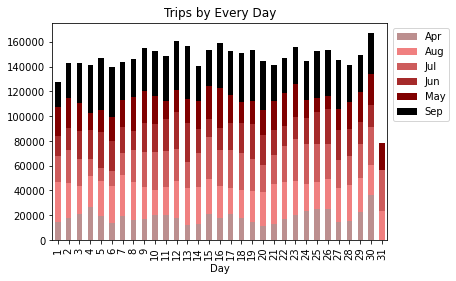

In [14]:
#Trips Every Day for Each Month
final_df.groupby(['Month','Day'])['Day'].count().unstack('Month').plot.bar(stacked=True,color=("rosybrown","lightcoral","indianred","brown","maroon","black"),title="Trips by Every Day").legend(bbox_to_anchor=(1.2, 1))

In [15]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4534327 entries, 1028135 to 0
Data columns (total 7 columns):
 #   Column     Dtype         
---  ------     -----         
 0   Date/Time  datetime64[ns]
 1   Lat        float64       
 2   Lon        float64       
 3   Base       object        
 4   Month      object        
 5   Day        int64         
 6   DOW        int64         
dtypes: datetime64[ns](1), float64(2), int64(2), object(2)
memory usage: 276.8+ MB


In [16]:
final_df.describe()

,Lat,Lon,Day,DOW
count,4.534327e+06,4.534327e+06,4.534327e+06,4.534327e+06
mean,4.073926e+01,-7.397302e+01,1.594337e+01,2.968115e+00
std,3.994991e-02,5.726670e-02,8.744902e+00,1.875971e+00
min,3.965690e+01,-7.492900e+01,1.000000e+00,0.000000e+00
25%,4.072110e+01,-7.399650e+01,9.000000e+00,1.000000e+00
50%,4.074220e+01,-7.398340e+01,1.600000e+01,3.000000e+00
75%,4.076100e+01,-7.396530e+01,2.300000e+01,5.000000e+00
max,4.211660e+01,-7.206660e+01,3.100000e+01,6.000000e+00


# What did and did not work out 

The data date and time column was initially in the object format which caused a lot of issues to extract and transorm data, then I changed the type to Date/Time which is much easier and the process faster.

# Explaining the Columns:

The columns in the data set gave infromation about the Date Time , Latitude , Longitude and the Base. The base is basically a location given to range of area pertaining to a latitudnal and longitudnal range. Initially the Date and Time column was an 'object' data type , which I transformed to type Date/Time to extract the different components like the month, day and day of the week. I would like to use these columns and extract the components the hours and minutes and plot them against the base to understand where and when were the maximum pick ups in NYC. This could further help Uber understand the trend and do the needful.